# Exercício prático 1
Rafael Rocha

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Algoritmo Bubble sort

In [2]:
def bubblesort_comandos(x):
    
    """
    
    Parameters
    ----------
    x : 
        Vetor de números a serem ordenados.
    
    Returns
    -------
    y :
        Vetor de números ordenados.
    C :
        Vetor de quantidade de comandos executados
    """
        
    C = np.zeros(4) # Comandos executados
    n = np.size(x)

    y = x.copy()
    
    for i in range(n):
        C[0]+=1 # Custo loop 1
        for j in range(n-1):
            C[1]+=1 # Custo loop 2
            if y[j]>y[j+1]:
                C[2]+=1 # Custo if
                temp = y[j]
                y[j] = y[j+1]
                y[j+1] = temp
                C[3]+=3 # Custo troca
    
    return y, C

In [3]:
def bubblesort_tempo(x):
    
    """
    
    Parameters
    ----------
    x : 
        Vetor de números a serem ordenados.
    
    Returns
    -------
    y :
        Vetor de números ordenados.
    T :
        Tempo de execução do algoritmo
    """
        
    n = np.size(x)

    y = x.copy()
    
    start_time = time.time()
    for i in range(n):
        for j in range(n-1):
            if y[j]>y[j+1]:
                temp = y[j]
                y[j] = y[j+1]
                y[j+1] = temp
    T = time.time() - start_time # Tempo de execução
    
    return y, T

## Exemplo de ordenação
O código [ep1_gerador](ep1_gerador.ipynb) é utilizado para gerar os dados aleatoriamente (diferentes tamanhos) e criar o melhor caso, caso médio e pior caso para o algoritmo Bubble sort.

In [4]:
df = pd.read_csv('dados/ep1/n_20.csv')

In [5]:
x = df['medio'].values

In [6]:
y, C = bubblesort_comandos(x)
_, T = bubblesort_tempo(x)

In [7]:
print('Vetor: ', x)
print('Vetor ordenado: ', y)
print('Comandos executados: ', C.sum())
print('Tempo de execução (ms): ', T*1000)

Vetor:  [11 89 22 49 10 15 11 20 81 68 26 55 76 54 34 82  5 12 88 82]
Vetor ordenado:  [ 5 10 11 11 12 15 20 22 26 34 49 54 55 68 76 81 82 82 88 89]
Comandos executados:  692.0
Tempo de execução (ms):  0.0


## Resultados
Conforme o tamanho do vetor a ser ordenado aumenta, tanto o número de comandos executados quanto o tempo de execução do algoritmo aumentam, conforme mostram os gráficos abaixo. O gráfico de comados executados pelo tamanho da entrada mostra o melhor caso (vetor já ordenado) do Bubble sort, com aproximadamente 10.000 comandos executados, enquanto o pior caso (ordenado inversamente) com quase 30.000 comandos executados quando o tamanho do vetor é 100. O mesmo acontece com o tempo de execução, onde no pior caso é aproximadamente o dobro do tempo gasto no melhor caso, para o tamanho do vetor igual a 100.

In [8]:
n_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

C_matriz = np.zeros((len(n_list), 3))
T_matriz = np.zeros((len(n_list), 3))

i=0
# Loop comprimentos de entrada
for n in n_list:
    nome = 'dados/ep1/n_'+str(n)+'.csv'
    df = pd.read_csv(nome)
    
    melhor = df['melhor'].values
    medio = df['medio'].values
    pior = df['pior'].values
    
    caso_list = [melhor, medio, pior]
    
    # Loop casos: melhor, médio e pior
    for j in range(len(caso_list)):
        
        x, C = bubblesort_comandos(caso_list[j])
        x, T = bubblesort_tempo(caso_list[j])
        
        C_matriz[i,j] = C.sum()
        T_matriz[i,j] = T
    
    i+=1

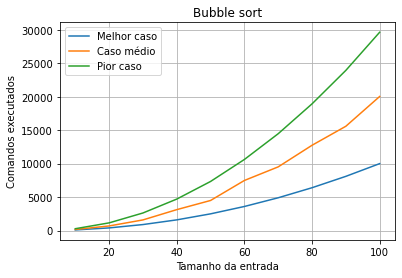

In [9]:
x_axis = np.arange(1, np.size(C_matriz, 0)+1)
caso = ['Melhor caso', 'Caso médio', 'Pior caso']

plt.plot(n_list, C_matriz[:,0])
plt.plot(n_list, C_matriz[:,1])
plt.plot(n_list, C_matriz[:,2])
plt.legend(caso)
plt.ylabel('Comandos executados')
plt.xlabel('Tamanho da entrada')
plt.title('Bubble sort')
plt.grid()
#plt.savefig('resultados/ep1/comandoXentrada.pdf', bbox_inches = 'tight')
plt.show()

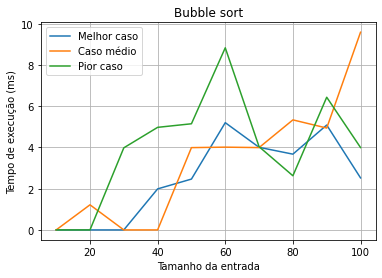

In [10]:
x_axis = np.arange(1, np.size(T_matriz, 0)+1)
caso = ['Melhor caso', 'Caso médio', 'Pior caso']

plt.plot(n_list, T_matriz[:,0]*1000)
plt.plot(n_list, T_matriz[:,1]*1000)
plt.plot(n_list, T_matriz[:,2]*1000)
plt.legend(caso)
plt.title('Bubble sort')
plt.ylabel('Tempo de execução (ms)')
plt.xlabel('Tamanho da entrada')
plt.grid()
#plt.savefig('resultados/ep1/tempoXentrada.pdf', bbox_inches = 'tight')
plt.show()